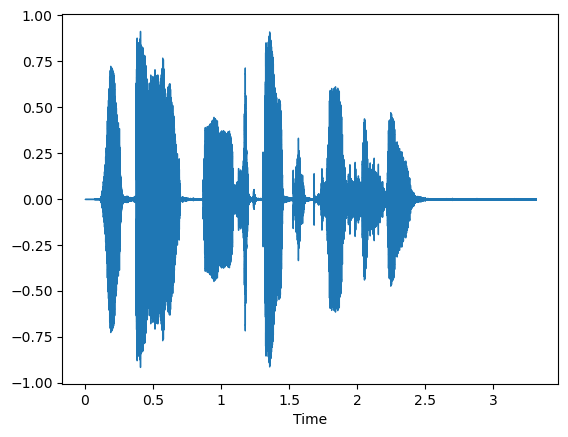

In [1]:
import librosa
import librosa.display
import IPython.display as ipd

speech_signal, sr = librosa.load(r"C:\Users\HP\Downloads\speech processing.mp3")
librosa.display.waveshow(speech_signal);

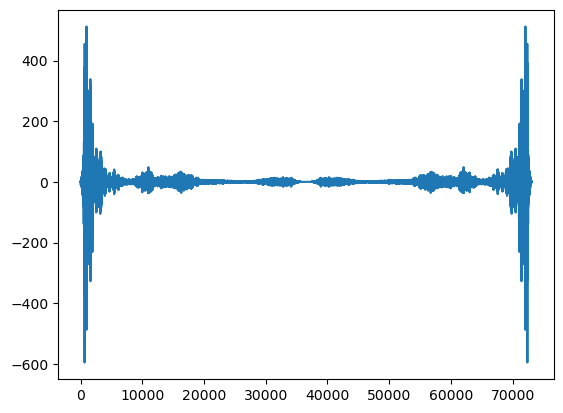

In [2]:
import numpy as np
import matplotlib.pyplot as plt
FFT_Signal = np.fft.fft(speech_signal)
plt.plot(FFT_Signal.real); 

C:\Users\HP\anaconda3\New folder\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


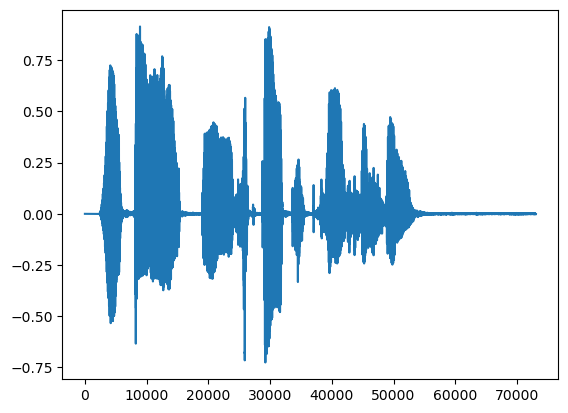

In [3]:
IFFT_Signal = np.fft.ifft(FFT_Signal);
plt.plot(IFFT_Signal);

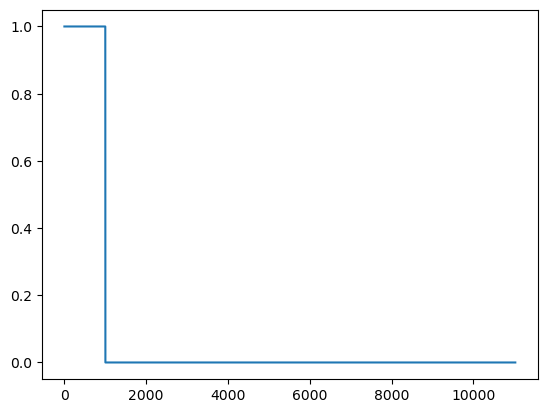

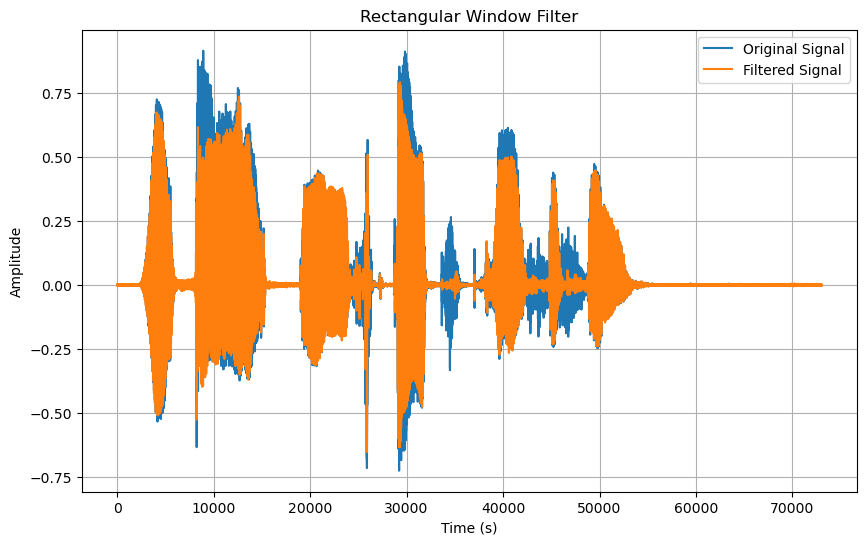

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def rectangular_window_filter(signal, cutoff_freq, fs):
    n = len(signal)
    freqs = np.fft.rfftfreq(n, d=1/fs)  
    mask = np.abs(freqs) <= cutoff_freq 
    plt.plot(freqs,mask)
    filtered_signal = np.fft.irfft(np.fft.rfft(signal) * mask, n)
    return filtered_signal

cutoff_freq = 1000
filtered_signal = rectangular_window_filter(speech_signal, cutoff_freq, sr)

plt.figure(figsize=(10, 6))
plt.plot(speech_signal, label='Original Signal')
plt.plot(filtered_signal, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Rectangular Window Filter')
plt.legend()
plt.grid()
plt.show()

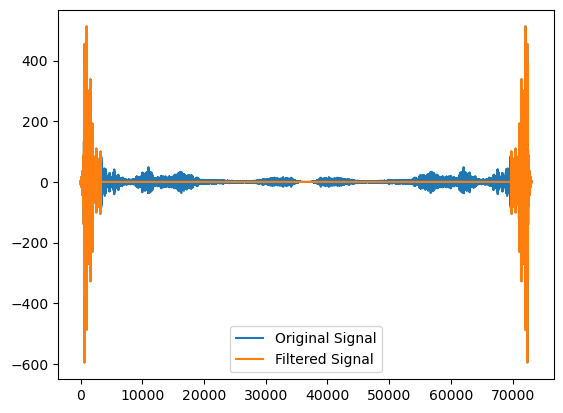

In [9]:
plt.plot(np.fft.fft(speech_signal).real,label='Original Signal');
plt.plot(np.fft.fft(filtered_signal).real,label='Filtered Signal');
plt.legend();

In [10]:
ipd.Audio(speech_signal,rate=sr)

In [11]:
ipd.Audio(filtered_signal,rate=sr)

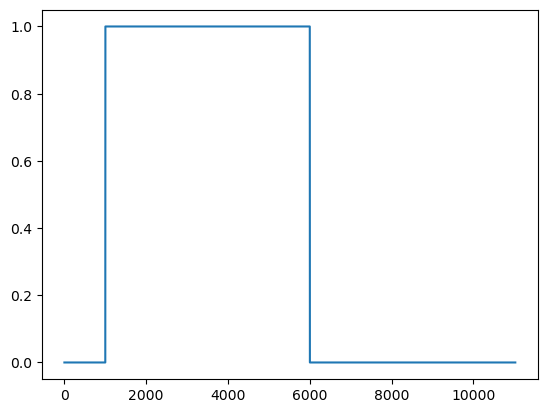

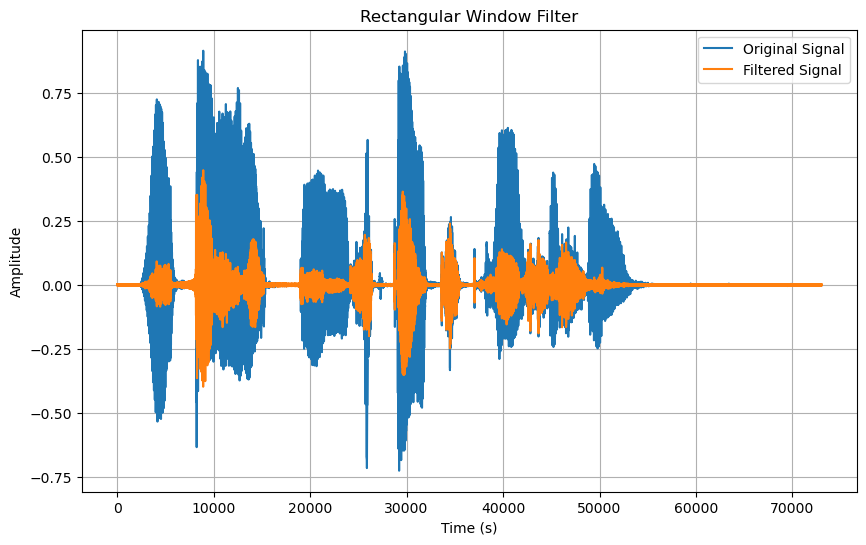

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def rectangular_window_filter(signal, lower_freq, higher_freq, fs):
    n = len(signal)
    freqs = np.fft.rfftfreq(n, d=1/fs)  
    mask = (np.abs(freqs) >= lower_freq) & (np.abs(freqs) <= higher_freq) 
    plt.plot(freqs,mask)
    filtered_signal = np.fft.irfft(np.fft.rfft(signal) * mask, n) 
    return filtered_signal

lower_freq = 1000  
higher_freq = 6000
filtered_signal = rectangular_window_filter(speech_signal, lower_freq, higher_freq, sr)

plt.figure(figsize=(10, 6))
plt.plot(speech_signal, label='Original Signal')
plt.plot(filtered_signal, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Rectangular Window Filter')
plt.legend()
plt.grid()
plt.show()

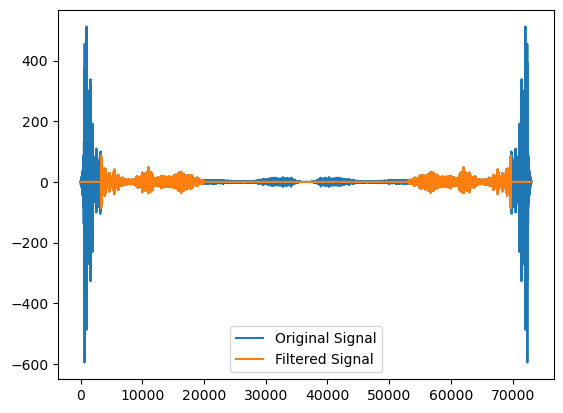

In [15]:
plt.plot(np.fft.fft(speech_signal).real,label='Original Signal');
plt.plot(np.fft.fft(filtered_signal).real,label='Filtered Signal');
plt.legend();

In [16]:
ipd.Audio(speech_signal,rate=sr)

In [17]:
ipd.Audio(filtered_signal,rate=sr)

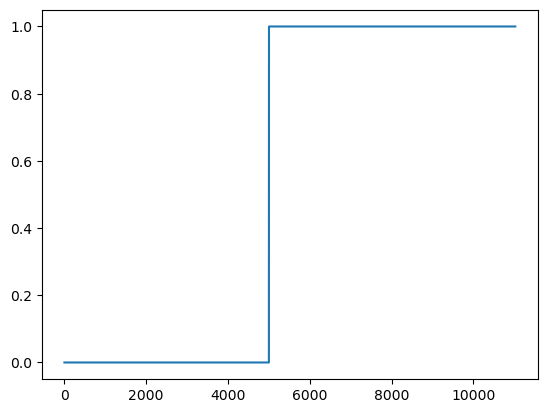

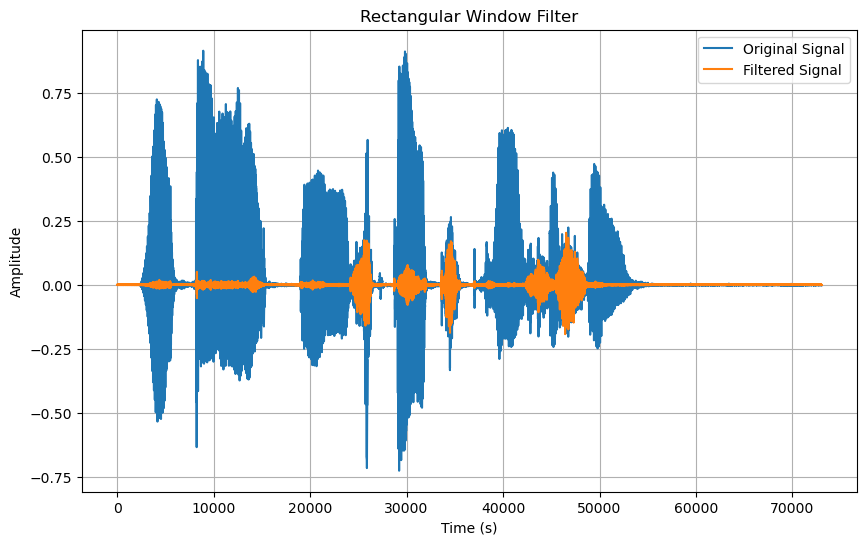

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def rectangular_window_filter(signal, cutoff_freq, fs):
    n = len(signal)
    freqs = np.fft.rfftfreq(n, d=1/fs)  
    mask = np.abs(freqs) >= cutoff_freq  
    plt.plot(freqs,mask) 
    filtered_signal = np.fft.irfft(np.fft.rfft(signal) * mask, n) 
    return filtered_signal

cutoff_freq = 5000  
filtered_signal = rectangular_window_filter(speech_signal,cutoff_freq, sr)

plt.figure(figsize=(10, 6))
plt.plot(speech_signal, label='Original Signal')
plt.plot(filtered_signal, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Rectangular Window Filter')
plt.legend()
plt.grid()
plt.show()

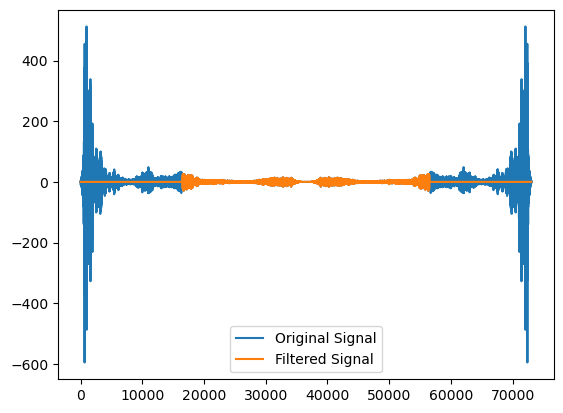

In [23]:
plt.plot(np.fft.fft(speech_signal).real,label='Original Signal');
plt.plot(np.fft.fft(filtered_signal).real,label='Filtered Signal');
plt.legend();

In [24]:
ipd.Audio(speech_signal,rate=sr)

In [25]:
ipd.Audio(filtered_signal,rate=sr)

C:\Users\HP\AppData\Local\Temp\ipykernel_4648\2517414426.py:7: DeprecationWarning: Importing cosine from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.cosine' or the convenience function 'scipy.signal.get_window' instead.
  cosine_filter = cosine(window_size, np.pi * cutoff_freq)


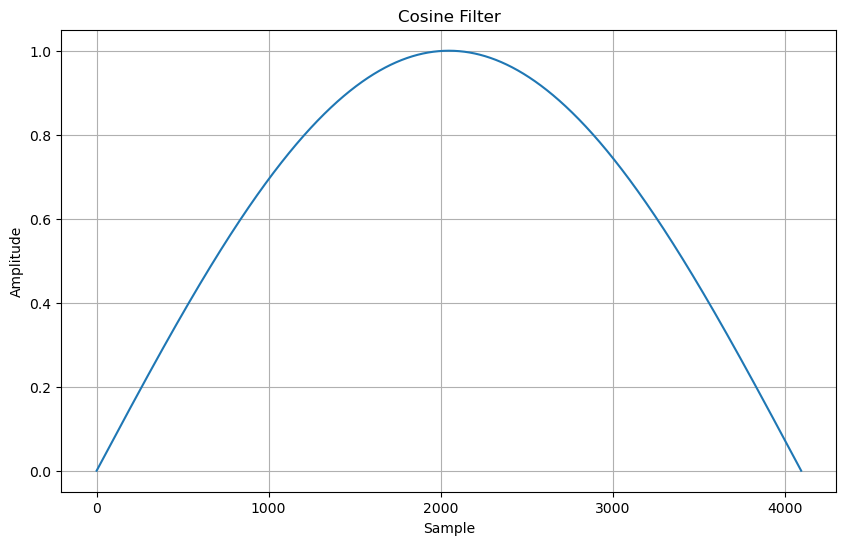

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cosine

cutoff_freq = 1000  
window_size = 4096  
cosine_filter = cosine(window_size, np.pi * cutoff_freq)

plt.figure(figsize=(10, 6))
plt.plot(cosine_filter)
plt.title('Cosine Filter')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_4648\4110192551.py:5: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian_filter = gaussian(window_size, std=std_dev)


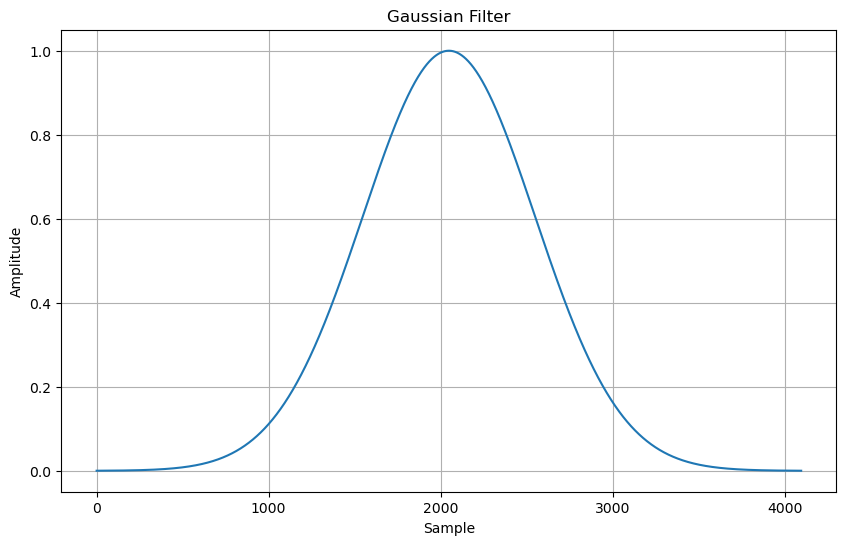

In [27]:
from scipy.signal import gaussian

# Generate a Gaussian filter
std_dev = 500  # Standard deviation of the Gaussian kernel
gaussian_filter = gaussian(window_size, std=std_dev)

# Plot the Gaussian filter
plt.figure(figsize=(10, 6))
plt.plot(gaussian_filter)
plt.title('Gaussian Filter')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

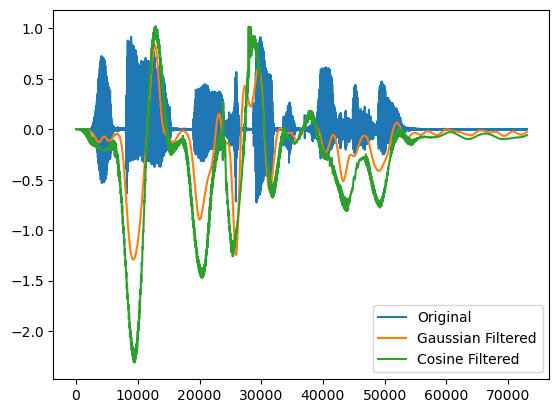

In [29]:
import librosa
from scipy.signal import convolve

speech_signal_filtered_cosine = convolve(speech_signal, cosine_filter, mode='same')
speech_signal_filtered_gaussian = convolve(speech_signal, gaussian_filter, mode='same')
plt.plot(speech_signal,label="Original")
plt.plot(speech_signal_filtered_gaussian, label='Gaussian Filtered')
plt.plot(speech_signal_filtered_cosine, label='Cosine Filtered')
plt.legend()

In [30]:
ipd.Audio(speech_signal,rate=sr)

In [31]:
ipd.Audio(speech_signal_filtered_cosine,rate=sr)

In [32]:
ipd.Audio(speech_signal_filtered_gaussian,rate=sr)